In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [23]:
train_data = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
display(train_data.head())
print(train_data.shape)

test_data = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
print(display(test_data.head()))
print(test_data.shape)

test_solution_data = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
print(display (test_solution_data.head()))
print(test_solution_data.shape)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


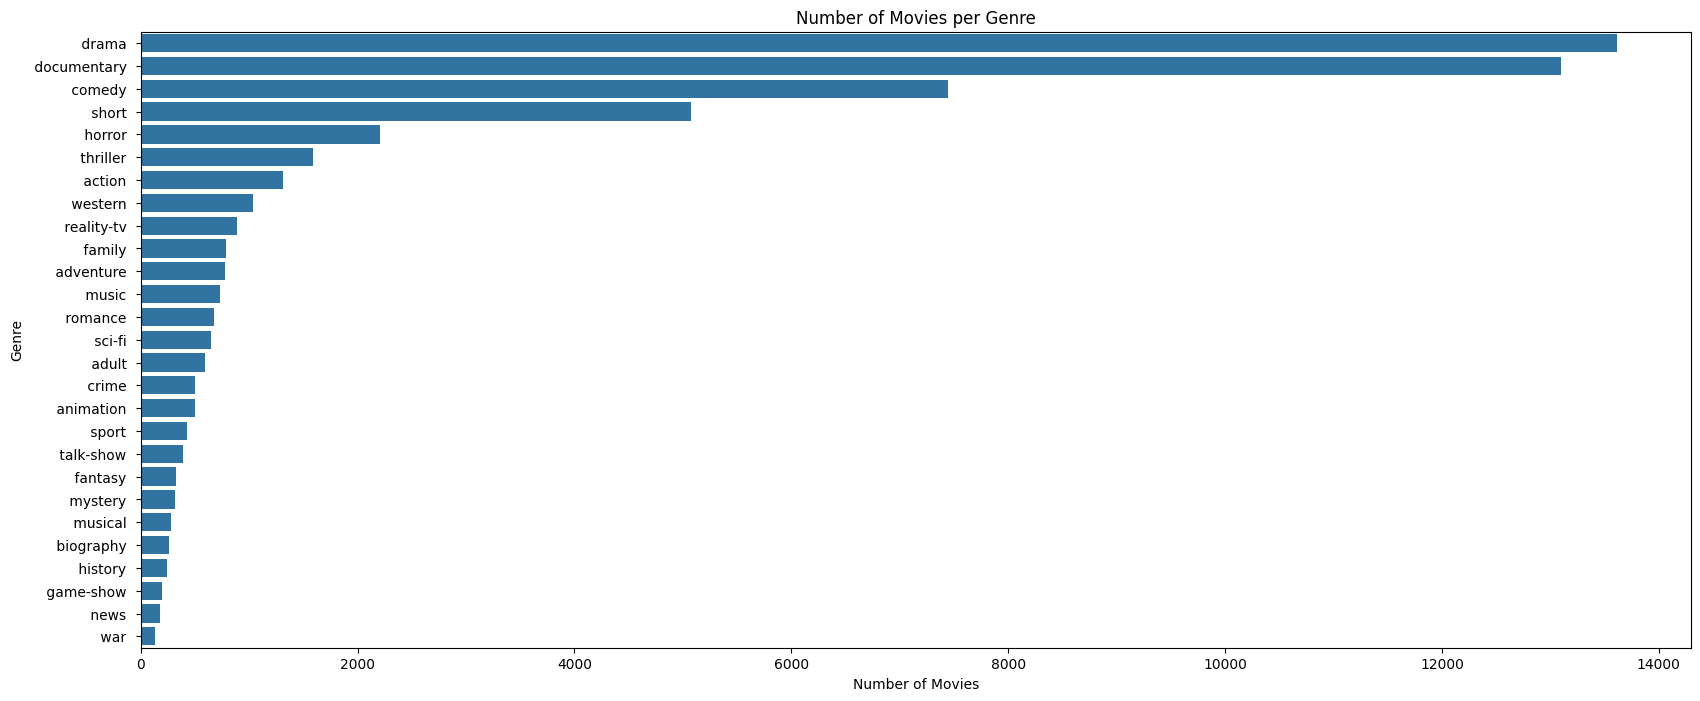

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

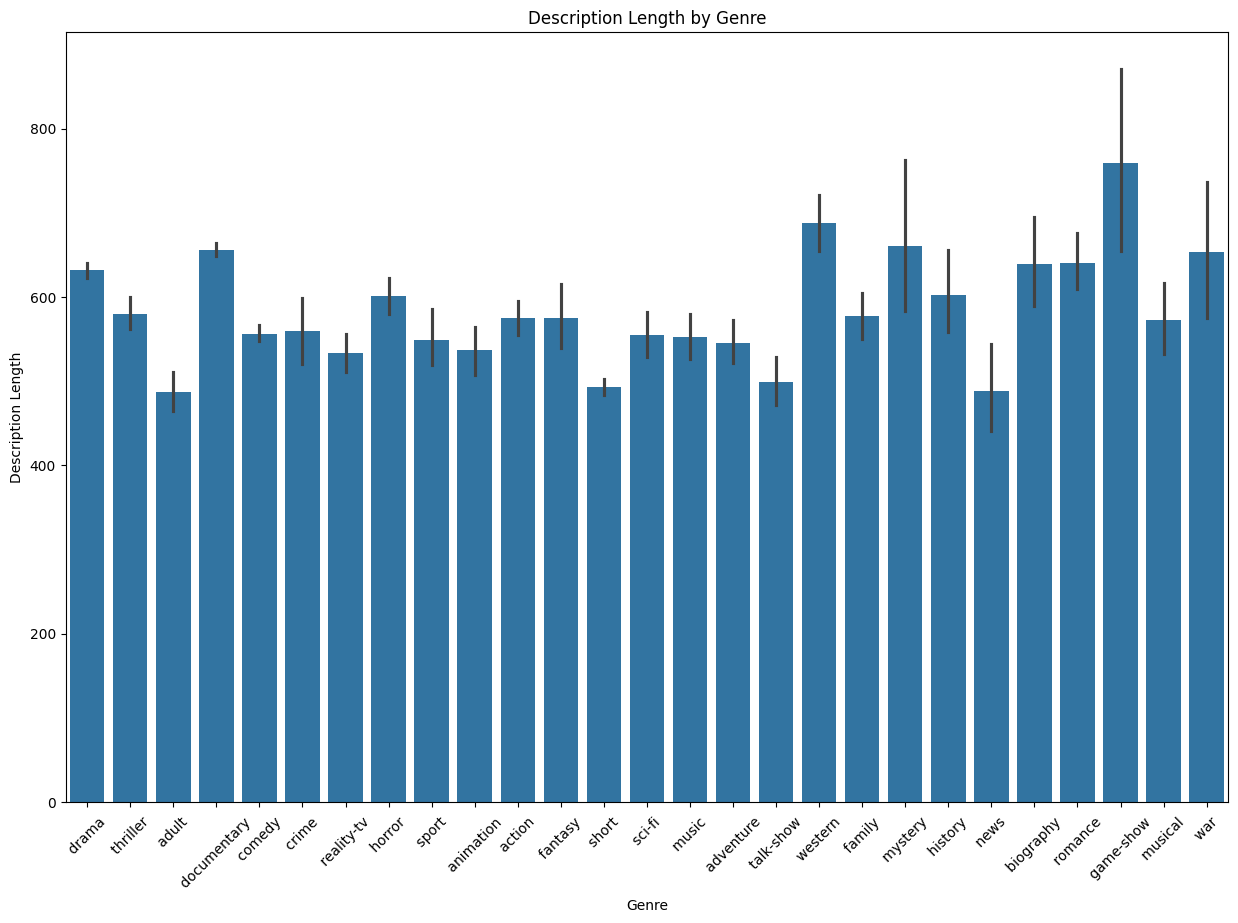

In [25]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y= 'DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

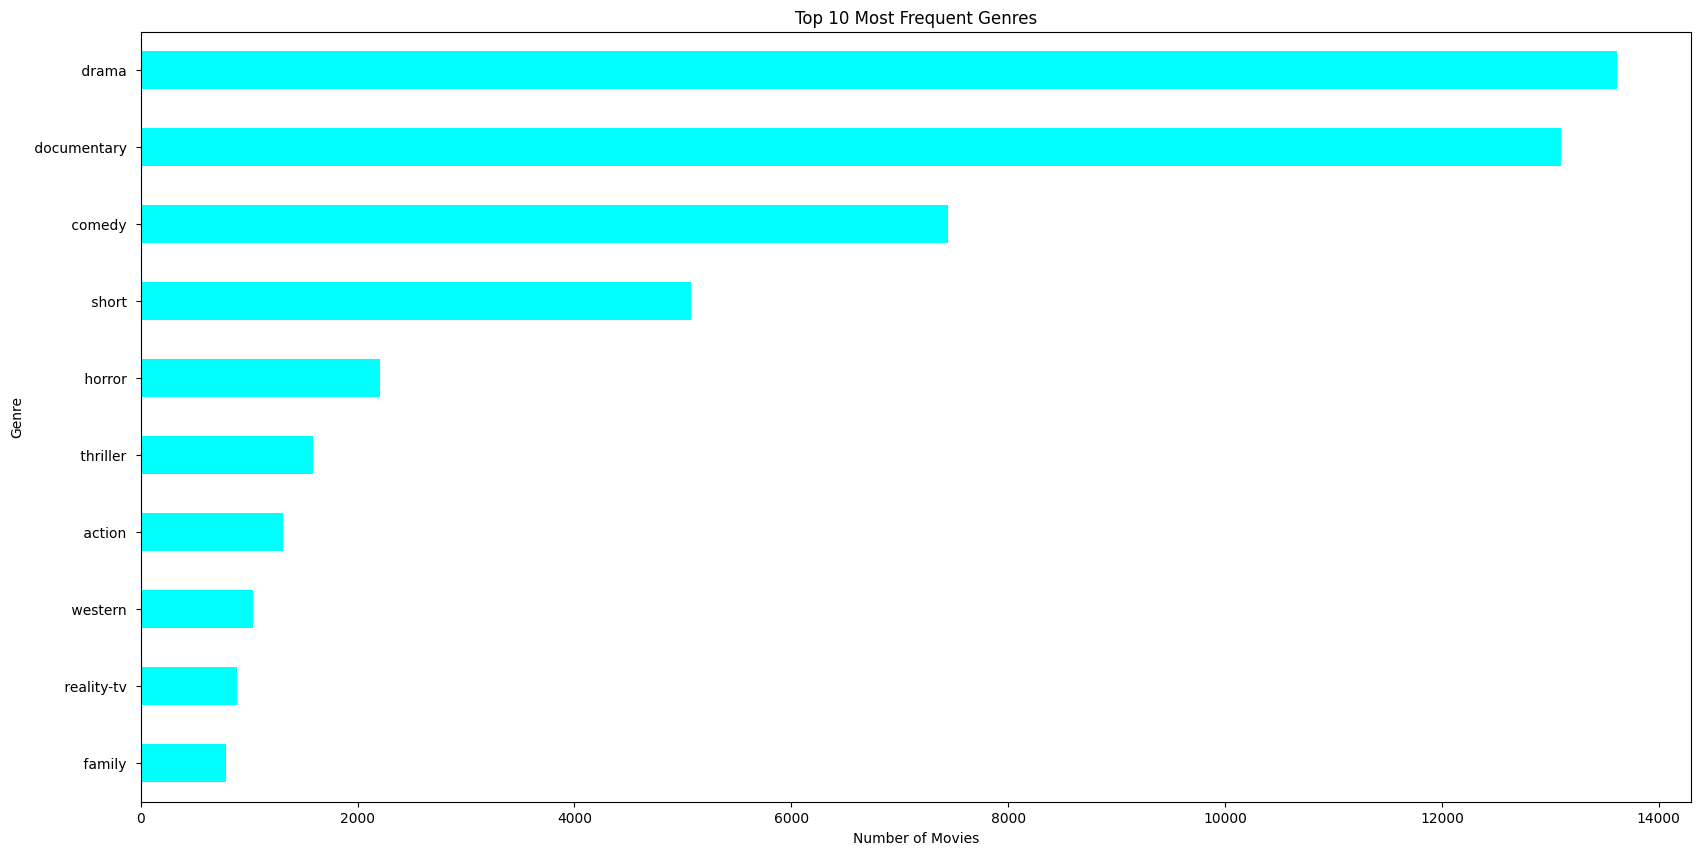

In [26]:
top_genres = train_data['GENRE'].value_counts().head (10)
plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis() # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [27]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

/tmp/ipython-input-27-455935619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['DESCRIPTION'].fillna("", inplace=True)
/tmp/ipython-input-27-455935619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [28]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report: \n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5858157336530481
Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.32      0.38       263
           1       0.75      0.43      0.55       112
           2       0.46      0.21      0.29       139
           3       0.44      0.14      0.22       104
           4       0.00      0.00      0.00        61
           5       0.53      0.60      0.56      1443
           6       0.35      0.06      0.10       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.25      0.05      0.09        74
          11       0.81      0.62      0.70        40
          12       0.00      0.00      0.00        45
          13       0.66      0.67      0.66       431
          14       0.62      0.54      0.58       144
          15       0.25      0.04      0.07        50
     

In [29]:
y_pred = clf.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_pred))
print("Test Classification Report: \n", classification_report(y_val, y_val_pred))

Test Accuracy: 0.5858157336530481
Test Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.32      0.38       263
           1       0.75      0.43      0.55       112
           2       0.46      0.21      0.29       139
           3       0.44      0.14      0.22       104
           4       0.00      0.00      0.00        61
           5       0.53      0.60      0.56      1443
           6       0.35      0.06      0.10       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.25      0.05      0.09        74
          11       0.81      0.62      0.70        40
          12       0.00      0.00      0.00        45
          13       0.66      0.67      0.66       431
          14       0.62      0.54      0.58       144
          15       0.25      0.04      0.07        50
          16     

In [30]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

In [31]:
sample_descr_for_movie =  "  Ex-Formula 1 rookie of the year and Motor Racing Champion Tiago Monteiro is an Official SEAT Sport driver in the World Touring Car Championship (WTCC), an Official ORECA driver at the 24 hours of LeMans and 1000km of Algarve, the owner and team principal of GP2 Ocean Racing team, the owner of two brand new hip restaurants in his native Porto, the owner of a clothing and events company, not to mention a husband and father of two. This is the amazing story of the world's busiest athlete."
print(predict_movie(sample_descr_for_movie))
sample_descr_for_movie =  " Press is a story of young people overwhelmed by social discord and their surroundings. The film concisely depicts multiple factors underlying this situation. These are things that could affect any of us. People tend to clam up and stop communicating when depressed or upset. It is also not uncommon for people to note the expression on an individual's face and decide to leave them alone, even if the individual concerned does not actually consider their problem to be serious. The events in this film are no exaggeration. Rather, they are emblematic of a modern disease, in which a family and those surrounding it slip into a negative momentum. How to address the problem of communication breakdown is a question with great value and meaning for contemporary society"
print(predict_movie(sample_descr_for_movie))

 sport 
 drama 
